# Modelos NO supervisados de Machine Learning

Aprendizaje no supervisado es un tipo de aprendizaje automático en el que el modelo no tiene acceso a etiquetas o resultados conocidos. En lugar de predecir una salida, el objetivo es encontrar patrones o estructuras ocultas dentro de los datos. El modelo explora las relaciones entre los datos para agrupar sin saber previamente cuáles son los "grupos" correctos.

En este *notebook* vamos a aprender a utilizar **K-Medias**.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Objetivo

-  Imagina que tienes un grupo de flores y has tomado varias mediciones de cada una, como el largo y ancho de los pétalos. Sin saber qué especie es cada flor, te preguntas si hay alguna forma natural de agruparlas solo basándote en esas mediciones.

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/flores_sinet.png?raw=true'>


-  El objetivo del aprendizaje no supervisado es descubrir si hay patrones o estructuras ocultas en esos datos que te ayuden a identificar grupos de flores similares, sin tener etiquetas o categorías predefinidas.

- De esta manera, puedes ver si, por ejemplo, ciertas flores tienden a tener características parecidas que las diferencian de otras, formando "grupos" de manera automática.

# Cargar los datos

In [2]:
# Cargar el conjunto de datos Iris desde Seaborn
df = sns.load_dataset('iris')[['petal_length', 'petal_width']]
df.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


| Columna           | Nombre en Español       | Explicación                                                   |
|-------------------|-------------------------|---------------------------------------------------------------|
| petal_length      | largo del pétalo         | Longitud del pétalo en centímetros.                           |
| petal_width       | ancho del pétalo         | Ancho del pétalo en centímetros.                              |


# Análisis Exploratorio de Datos

Al igual que en el mundo supervisado, es buena idea entender mejor nuestro conjunto de datos.

# Preprocesar los datos si es necesario

- Como este es un problema de aprendizaje no supervisado, no es necesario dividir los datos en conjuntos de entrenamiento y prueba, ya que no estamos entrenando el modelo para hacer predicciones sobre nuevos datos etiquetados.

- En lugar de eso, el modelo KMeans agrupa los datos basándose únicamente en las características disponibles.

- Sin embargo, es importante tener en cuenta que KMeans y otros algoritmos de clustering son sensibles a las distancias.

  - Esto significa que las características con diferentes escalas pueden influir en el resultado, ya que KMeans usa la distancia euclidiana para calcular la similitud entre los puntos.
  
  - Si las variables tienen diferentes escalas (por ejemplo, una característica está en milímetros y otra en metros), una característica podría dominar el clustering solo debido a su magnitud. En estos casos, es recomendable hacer una normalización o estandarización de los datos para que todas las variables estén en una escala comparable.

# Escogiendo $K$

- El valor de **K** en KMeans representa la cantidad de grupos que queremos encontrar en nuestros datos.

- Dado que en un problema de aprendizaje no supervisado no conocemos las etiquetas de clase, escoger el número adecuado de clusters es un desafío.

## Método del codo 💪
Este es uno de los métodos más utilizados para escoger **K**.

 - Se ejecuta KMeans para diferentes valores de **K** y se grafica la inercia. Al aumentar **K**, la inercia disminuye, pero eventualmente llega un punto en el que la reducción de la inercia se vuelve menos significativa. Este punto de inflexión se conoce como el **codo**, y es donde se sugiere que se elija **K**.


In [4]:
lista_inercia = []
for i in range(1, 11):  # Vamos a revisar para 10 grupos
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(df)
    lista_inercia.append(kmeans.inertia_)

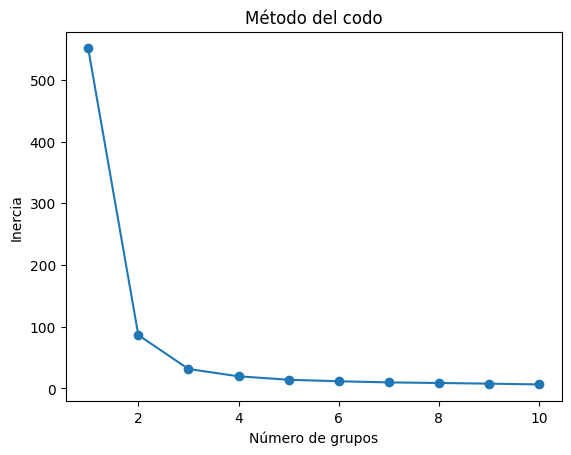

In [5]:
plt.figure()
plt.plot(range(1, 11), lista_inercia, marker='o')
plt.xlabel('Número de grupos')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()

In [6]:
# Según la grafica, escogemos un número optimo para K (número de grupos)
k = 3  # Esto puede cambiar según la grafica

# Entrenamos el modelo

In [9]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
grupos = kmeans.fit_predict(df)

# Visualizamos los resultados

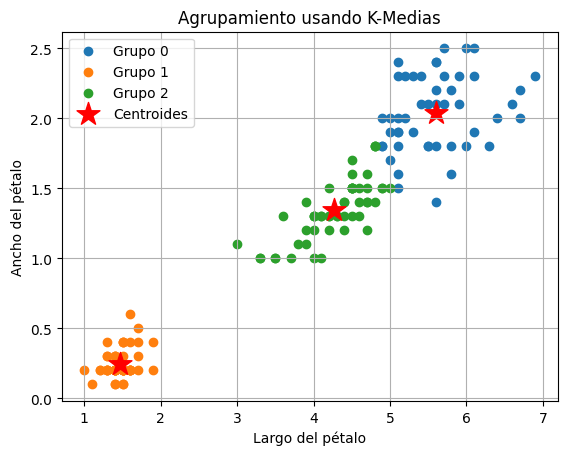

In [11]:
plt.figure()
for i in range(k):
    plt.scatter(df.values[grupos == i, 0], df.values[grupos == i, 1], label=f'Grupo {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroides')
plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Agrupamiento usando K-Medias')
plt.legend()
plt.grid(True)
plt.show()

# Ejemplo para predecir una nueva observación

In [14]:
# Supongamos que la nueva observación es: largo del pétalo = 5.0, ancho del pétalo = 1.5
nueva_observacion = pd.DataFrame({
    'petal_length': [5.0],
    'petal_width': [1.5]
})

# Predecir el grupo al que pertenece la nueva observación
prediccion_grupo = kmeans.predict(nueva_observacion)
print(f'La nueva observación pertenece al grupo: {prediccion_grupo[0]}')

La nueva observación pertenece al grupo: 2


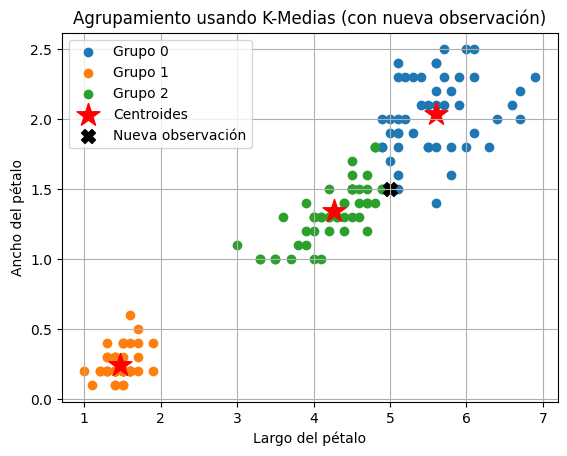

In [20]:
plt.figure()

for i in range(k):
    plt.scatter(df.values[grupos == i, 0], df.values[grupos == i, 1], label=f'Grupo {i}')

# Visualizar los centroides
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroides')

# Visualizar la nueva observación
plt.scatter(nueva_observacion['petal_length'], nueva_observacion['petal_width'], color='black', marker='X', s=100, label='Nueva observación')

plt.xlabel('Largo del pétalo')
plt.ylabel('Ancho del pétalo')
plt.title('Agrupamiento usando K-Medias (con nueva observación)')
plt.legend()
plt.grid(True)
plt.show()

# Recomendaciones

Es fundamental para los científicos de datos interpretar su modelo y dar recomendaciones de negocio porque el objetivo final del análisis no es solo desarrollar modelos precisos, sino generar valor real para la organización o empresa. Los modelos de machine learning y análisis estadístico por sí mismos no son útiles si las partes interesadas no comprenden cómo pueden aplicarse a la toma de decisiones. Los científicos de datos deben ser capaces de traducir los resultados técnicos (como coeficientes, métricas de rendimiento, etc.) en recomendaciones de negocio accionables.



---

En este proyecto, al aplicar KMeans a las características de largo y ancho del pétalo de las flores, podemos identificar grupos naturales de flores basadas en estas dimensiones.

- Sin embargo, no es claro si el número óptimo de grupos es 2 o 3, lo que introduce cierta incertidumbre en la interpretación de los resultados. Esto sugiere que sería recomendable recolectar más datos para mejorar la precisión del análisis o consultar con un biólogo para validar si estas diferencias morfológicas corresponden efectivamente a especies distintas o a variaciones dentro de las mismas.

- Desde una perspectiva empresarial, este análisis podría ayudar a organizar mejor las flores en una tienda o vivero. Al agruparlas según sus características físicas, sería más fácil crear categorías para promociones específicas o ajustar el inventario según las preferencias de los clientes. Esto también podría mejorar la logística, facilitando la disposición de las flores de manera más eficiente y atractiva.

